In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import requests
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

coco=COCO(annFile)

loading annotations into memory...
Done (t=13.23s)
creating index...
index created!


In [3]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['apple']);
imgIds = coco.getImgIds(catIds=catIds );

In [4]:
total_images = len(imgIds)
print(total_images)

1586


In [5]:
#img = imgIds[113]
img = imgIds[3]
print(img)

434201


In [6]:
img = coco.loadImgs(img)

In [7]:
print(img)

[{'license': 1, 'file_name': '000000434201.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000434201.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-15 17:31:37', 'flickr_url': 'http://farm5.staticflickr.com/4101/4754224338_3fa2a71130_z.jpg', 'id': 434201}]


In [8]:
print(img[0]["file_name"])

000000434201.jpg


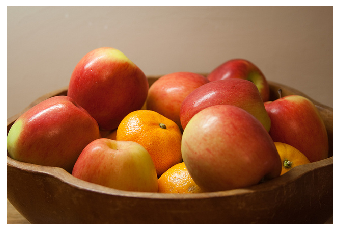

In [9]:
# load and display image
I = io.imread("{}/images/{}".format(dataDir, img[0]['file_name']))

plt.axis('off')
plt.imshow(I)
plt.show()

In [10]:
# annIds = coco.getAnnIds(imgIds=img[0]['id'], catIds=catIds, iscrowd=None) solo anotacion de manzana
annIds = coco.getAnnIds(imgIds=img[0]['id'], iscrowd=None) # todas las ontaciones de la images
print(annIds)

[1051899, 1053265, 1538499, 1549564, 1549825, 1550104, 1550372, 1550858, 1556126]


In [11]:
anns = coco.loadAnns(annIds)

In [12]:
np.shape(anns)

(9,)

In [13]:
print(anns)

[{'segmentation': [[221.77, 231.69, 234.24, 215.99, 248.73, 206.33, 274.08, 202.31, 299.83, 211.57, 324.38, 224.85, 337.26, 235.31, 342.09, 252.61, 341.69, 277.96, 343.3, 302.49, 340.88, 306.89, 321.16, 315.34, 305.07, 327.01, 296.21, 330.63, 286.55, 300.45, 274.08, 282.74, 260.0, 267.85, 228.61, 263.42, 217.34, 263.02, 214.12, 249.34]], 'area': 9584.60895, 'iscrowd': 0, 'image_id': 434201, 'bbox': [214.12, 202.31, 129.18, 128.32], 'category_id': 55, 'id': 1051899}, {'segmentation': [[298.09, 339.89, 321.26, 315.72, 335.36, 306.65, 342.41, 305.65, 345.43, 306.65, 374.63, 354.99, 393.77, 367.08, 392.76, 368.09, 301.12, 369.09, 301.12, 362.04, 301.12, 347.94]], 'area': 3554.8761499999982, 'iscrowd': 0, 'image_id': 434201, 'bbox': [298.09, 305.65, 95.68, 63.44], 'category_id': 55, 'id': 1053265}, {'segmentation': [[3.84, 291.7, 51.82, 308.98, 112.27, 317.61, 157.37, 345.44, 252.36, 361.75, 367.51, 366.55, 436.6, 357.91, 536.39, 332.96, 567.09, 308.02, 607.4, 304.18, 636.18, 292.66, 640.0,

[{'supercategory': 'food', 'id': 55, 'name': 'orange'}]
[{'supercategory': 'food', 'id': 55, 'name': 'orange'}]
[{'supercategory': 'kitchen', 'id': 51, 'name': 'bowl'}]
[{'supercategory': 'food', 'id': 53, 'name': 'apple'}]
[{'supercategory': 'food', 'id': 53, 'name': 'apple'}]
[{'supercategory': 'food', 'id': 53, 'name': 'apple'}]
[{'supercategory': 'food', 'id': 53, 'name': 'apple'}]
[{'supercategory': 'food', 'id': 53, 'name': 'apple'}]
[{'supercategory': 'food', 'id': 55, 'name': 'orange'}]


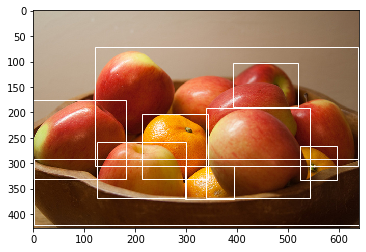

In [14]:
import matplotlib.patches as patches

# load and display instance annotations
plt.imshow(I);

for a in anns:
    print(coco.loadCats(a["category_id"]))
    x, y, w, h = a["bbox"]
    rect = patches.Rectangle((x, y), w, h,linewidth=1, edgecolor='w',facecolor='none')
    # Add the patch to the Axes
    plt.gca().add_patch(rect)

plt.show()
# coco.showAnns(anns)